Game Theory Network Routing Simulation
Trust Scores Between Nodes:

Trust between Node 1 and Node 2: 0.95
Trust between Node 1 and Node 4: 0.19
Trust between Node 2 and Node 3: 0.29
Trust between Node 4 and Node 3: 0.74
Trust between Node 4 and Node 5: 0.35
Trust between Node 3 and Node 5: 0.73

Best Trust-Based Path from Node 1 to Node 5: (1, 2, 3, 5) with Trust Score: 1.97


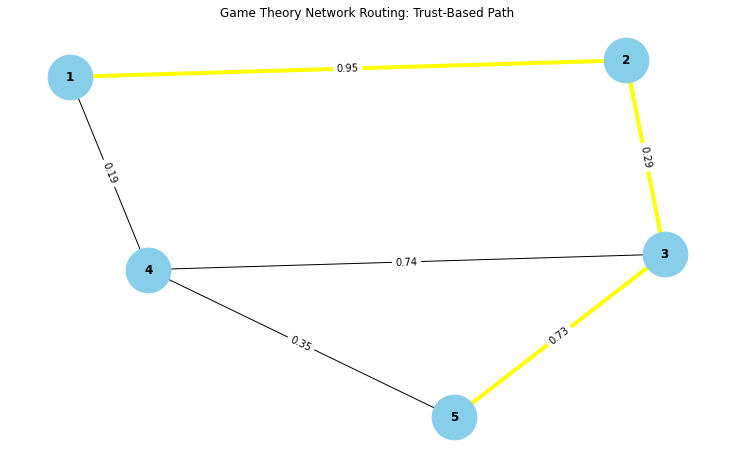

In [2]:
import random
import networkx as nx
import matplotlib.pyplot as plt

# Define the Network Graph
def create_network():
    G = nx.Graph()
    G.add_edges_from([
        (1, 2), (1, 4), (2, 3), (3, 4), (4, 5), (5, 3)
    ])
    return G

# Trust evaluation function
def evaluate_trust(node_a, node_b):
    return round(random.uniform(0.1, 1.0), 2)  # Random trust score between 0.1 and 1.0

# Perform Trust-Based Routing
def trust_routing_simulation(G):
    trust_scores = {}
    print("Trust Scores Between Nodes:\n")

    for edge in G.edges():
        node_a, node_b = edge
        trust = evaluate_trust(node_a, node_b)
        trust_scores[(node_a, node_b)] = trust
        print(f"Trust between Node {node_a} and Node {node_b}: {trust}")

    # Find the most trusted path
    source, target = 1, 5  # Set source and destination nodes
    trusted_paths = {}
    for path in nx.all_simple_paths(G, source=source, target=target):
        total_trust = sum(trust_scores.get((min(path[i], path[i+1]), max(path[i], path[i+1])), 0)
                          for i in range(len(path)-1))
        trusted_paths[tuple(path)] = total_trust

    # Select the path with the highest trust
    best_path = max(trusted_paths, key=trusted_paths.get)
    print(f"\nBest Trust-Based Path from Node {source} to Node {target}: {best_path} "
          f"with Trust Score: {trusted_paths[best_path]:.2f}")
    return best_path, trust_scores

# Visualize the Network
def visualize_network(G, best_path, trust_scores):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_weight='bold')

    # Highlight the best path
    edges = [(best_path[i], best_path[i+1]) for i in range(len(best_path)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=4, edge_color='yellow')

    # Add trust scores as edge labels
    edge_labels = {edge: f"{trust}" for edge, trust in trust_scores.items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    plt.title("Game Theory Network Routing: Trust-Based Path")
    plt.show()

# Main Function
def main():
    print("Game Theory Network Routing Simulation\n" + "="*40)
    G = create_network()
    best_path, trust_scores = trust_routing_simulation(G)
    visualize_network(G, best_path, trust_scores)

if __name__ == "__main__":
    main()
